# ⚠️ Auto-generated Notebook
    
This notebook is automatically compiled from source files in `/workspaces/awesome-matrix/src/examples/01_matrix_multiplication`.
**Do not edit this file directly** as your changes will be overwritten.

To make changes:
1. Edit the source file `/workspaces/awesome-matrix/src/examples/01_matrix_multiplication/02_multiplication.py` instead
2. Run the compile script to regenerate this notebook

See [COMPILE.md](docs/COMPILE.md) for more information.


# 2. Matrix Multiplication

Let's understand how matrix multiplication works. Two matrices can be multiplied if the number of columns in the first matrix equals the number of rows in the second matrix.

Given:
- Matrix A with dimensions (m × n)
- Matrix B with dimensions (n × p)

We can compute C = A @ B, which will have dimensions (m × p).


## 2.1 Setup

First, let's import our dependencies and set up our visualization tools.


In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from typing import Tuple, List

# Create a nicer colormap for visualizing matrices
colors = [(0.8, 0.8, 1), (0.1, 0.3, 0.8)]  # Light blue to darker blue
cmap = LinearSegmentedColormap.from_list("custom_blue", colors, N=100)

# Helper function to visualize a single matrix
def visualize_matrix(matrix: torch.Tensor, title: str = "") -> None:
    """
    Visualize a matrix as a heatmap.
    
    Args:
        matrix: PyTorch tensor to visualize
        title: Optional title for the plot
    """
    # Convert to numpy for matplotlib
    matrix_np = matrix.detach().cpu().numpy()
    
    plt.figure(figsize=(7, 7))
    plt.imshow(matrix_np, cmap=cmap)
    plt.colorbar(shrink=0.8)
    
    # Add grid lines
    plt.grid(which='minor', color='w', linestyle='-', linewidth=0.5)
    
    # Add row and column indices
    for i in range(matrix_np.shape[0]):
        for j in range(matrix_np.shape[1]):
            plt.text(j, i, f"{matrix_np[i, j]:.1f}", 
                     ha="center", va="center", 
                     color="black" if matrix_np[i, j] < 0.7 else "white")
    
    # Add dimension annotations
    plt.title(f"{title}\nShape: {matrix_np.shape}")
    plt.xlabel(f"Columns (n={matrix_np.shape[1]})")
    plt.ylabel(f"Rows (m={matrix_np.shape[0]})")
    plt.tight_layout()
    plt.show()


## 2.2 Basic Matrix Multiplication

Let's create two matrices and multiply them:


In [2]:
# Create a 2×3 matrix (2 rows, 3 columns)
A = torch.tensor([[1., 2., 3.], 
                  [4., 5., 6.]])

# Create a 3×2 matrix (3 rows, 2 columns)
B = torch.tensor([[7., 8.], 
                  [9., 10.], 
                  [11., 12.]])

print(f"Matrix A shape: {A.shape}")
print(f"Matrix B shape: {B.shape}")


Matrix A shape: torch.Size([2, 3])
Matrix B shape: torch.Size([3, 2])


## 2.3 Visualizing Matrix Multiplication

Now we'll create a function to visualize the multiplication process:


In [3]:
def visualize_matrix_multiplication(A: torch.Tensor, B: torch.Tensor) -> None:
    """
    Visualize matrix multiplication A @ B with dimensions.
    
    Args:
        A: First matrix (m × n)
        B: Second matrix (n × p)
    """
    # Check compatibility
    if A.shape[1] != B.shape[0]:
        raise ValueError(f"Incompatible dimensions: A is {A.shape}, B is {B.shape}")
    
    # Perform the multiplication
    C = A @ B
    
    # Create figure with 3 subplots
    fig, axs = plt.subplots(1, 3, figsize=(16, 5))
    
    # Plot matrices
    matrices = [A, B, C]
    titles = [
        f"Matrix A\n{A.shape[0]}×{A.shape[1]}", 
        f"Matrix B\n{B.shape[0]}×{B.shape[1]}",
        f"Result C = A @ B\n{C.shape[0]}×{C.shape[1]}"
    ]
    
    for i, (matrix, title) in enumerate(zip(matrices, titles)):
        matrix_np = matrix.detach().cpu().numpy()
        im = axs[i].imshow(matrix_np, cmap=cmap)
        axs[i].set_title(title)
        
        # Add text annotations
        for r in range(matrix_np.shape[0]):
            for c in range(matrix_np.shape[1]):
                axs[i].text(c, r, f"{matrix_np[r, c]:.1f}", 
                           ha="center", va="center", 
                           color="black" if matrix_np[r, c] < 0.7 else "white")
    
    # Add a shared colorbar
    fig.colorbar(im, ax=axs, shrink=0.6)
    
    # Add the operation text between plots
    plt.figtext(0.31, 0.5, "@", fontsize=24)
    plt.figtext(0.64, 0.5, "=", fontsize=24)
    
    # Add dimension explanation
    m, n = A.shape
    n_check, p = B.shape
    plt.suptitle(f"Matrix Multiplication: ({m}×{n}) @ ({n_check}×{p}) → ({m}×{p})\n"
                f"The inner dimensions must match: {n} = {n_check}", fontsize=14)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()
    
    return C


/tmp/ipykernel_59783/3190812929.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


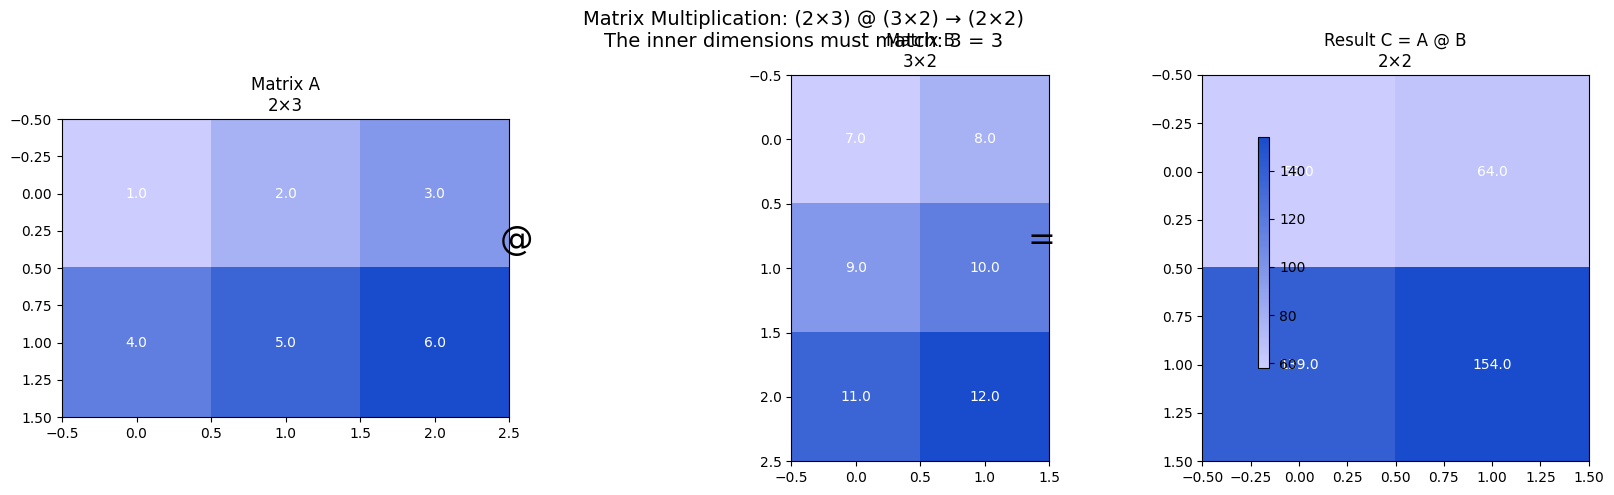

In [4]:
# Let's perform the matrix multiplication and visualize it
C = visualize_matrix_multiplication(A, B)


In [5]:
# Print the actual computation
print("Matrix multiplication result C = A @ B:")
print(C)

# Let's verify the dimensions
print(f"\nMatrix A shape: {A.shape}")
print(f"Matrix B shape: {B.shape}")
print(f"Result C shape: {C.shape}")
print("\nDimension rule: (m × n) @ (n × p) = (m × p)")
print(f"In our case: ({A.shape[0]} × {A.shape[1]}) @ ({B.shape[0]} × {B.shape[1]}) = ({C.shape[0]} × {C.shape[1]})")


Matrix multiplication result C = A @ B:
tensor([[ 58.,  64.],
        [139., 154.]])

Matrix A shape: torch.Size([2, 3])
Matrix B shape: torch.Size([3, 2])
Result C shape: torch.Size([2, 2])

Dimension rule: (m × n) @ (n × p) = (m × p)
In our case: (2 × 3) @ (3 × 2) = (2 × 2)


## 2.4 Computing the Elements of C

Each element C[i,j] in the result matrix is computed as the dot product of:
- row i from matrix A
- column j from matrix B

Let's compute a specific element to understand the process:


In [6]:
# Let's compute C[0,0] manually:
i, j = 0, 0  # The element at position (0,0)

# Get row i from A
row_i = A[i, :]
print(f"Row {i} from A: {row_i}")

# Get column j from B
col_j = B[:, j]
print(f"Column {j} from B: {col_j}")

# Compute the dot product
dot_product = sum(row_i[k] * col_j[k] for k in range(len(row_i)))
print(f"Dot product: {dot_product}")

# Verify with the result matrix
print(f"Value from C[{i},{j}]: {C[i,j]}")


Row 0 from A: tensor([1., 2., 3.])
Column 0 from B: tensor([ 7.,  9., 11.])
Dot product: 58.0
Value from C[0,0]: 58.0


Let's compute another element, C[1,1]:


In [7]:
# Let's compute C[1,1] manually:
i, j = 1, 1  # The element at position (1,1)

# Get row i from A
row_i = A[i, :]
print(f"Row {i} from A: {row_i}")

# Get column j from B
col_j = B[:, j]
print(f"Column {j} from B: {col_j}")

# Compute the dot product
dot_product = sum(row_i[k] * col_j[k] for k in range(len(row_i)))
print(f"Dot product: {dot_product}")

# Verify with the result matrix
print(f"Value from C[{i},{j}]: {C[i,j]}")


Row 1 from A: tensor([4., 5., 6.])
Column 1 from B: tensor([ 8., 10., 12.])
Dot product: 154.0
Value from C[1,1]: 154.0


## 2.5 Matrix Multiplication with PyTorch

PyTorch provides several ways to perform matrix multiplication:


In [8]:
# Method 1: Using the @ operator (recommended)
C1 = A @ B
print("Using @ operator:")
print(C1)

# Method 2: Using torch.matmul
C2 = torch.matmul(A, B)
print("\nUsing torch.matmul:")
print(C2)

# Method 3: Using torch.mm for 2D matrices
C3 = torch.mm(A, B)
print("\nUsing torch.mm:")
print(C3)

# Verify they all give the same result
print("\nAll methods equal?", torch.all(C1 == C2) and torch.all(C2 == C3))

Using @ operator:
tensor([[ 58.,  64.],
        [139., 154.]])

Using torch.matmul:
tensor([[ 58.,  64.],
        [139., 154.]])

Using torch.mm:
tensor([[ 58.,  64.],
        [139., 154.]])

All methods equal? tensor(True)
